# Jupyter Notebook Quick Start

* Hit ESCAPE to get into edit mode or ENTER to insert something in a cell.
* Use A or B to add cells above or below your current cell.
* Use M to change the cell type to markup and y to change it to code.

### Step 0 - Some Setup

In [14]:
!pwd

/raid10/active_users/groupD/ml


In [15]:
%matplotlib inline

In [16]:
from fastai.vision.all import *
from nbdev.showdoc import *

set_seed(42) # for reproducible random numbers

In [17]:
# Change this to another device (0-7) if you run out of memory
#torch.cuda.is_available()
torch.cuda.set_device(4)

In [18]:
bs = 20

# Get Data

In [19]:
# https://docs.fast.ai/data.external.html
path = 'Segmented'

In [20]:
fnames = get_image_files(path)
fnames

(#5659) [Path('Segmented/Common Chickweed/248.png'),Path('Segmented/Common Chickweed/672.png'),Path('Segmented/Common Chickweed/632.png'),Path('Segmented/Common Chickweed/416.png'),Path('Segmented/Common Chickweed/15.png'),Path('Segmented/Common Chickweed/262.png'),Path('Segmented/Common Chickweed/448.png'),Path('Segmented/Common Chickweed/370.png'),Path('Segmented/Common Chickweed/242.png'),Path('Segmented/Common Chickweed/468.png')...]

### Step 1 - Data Loader

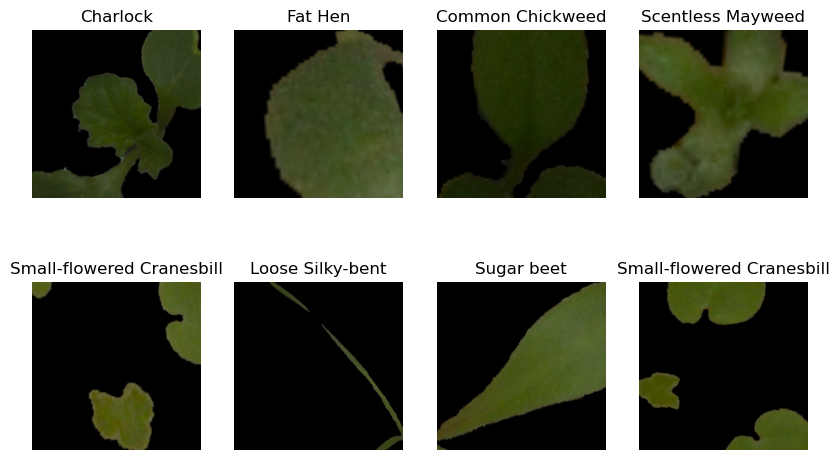

In [21]:
# Define the path to the directory
path = Path('Segmented')

# Custom function to get image files for each weed category
def get_weed_files(path):
    return get_image_files(path, recurse=True)

# Create a DataBlock
weeds = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_weed_files,
    get_y=parent_label,
    splitter=RandomSplitter(seed=42),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

# Create a DataLoader
data_loader = weeds.dataloaders(path)

# Show a batch of data
data_loader.show_batch(max_n=8, figsize=(10, 6))

In [24]:
# The Vocab contains all the labels for the dataset.
print(data_loader.vocab)
len(data_loader.vocab)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherd’s Purse', 'Small-flowered Cranesbill', 'Sugar beet']


12

In [27]:
len(data_loader.dataset)

4528

### Step 2 - Building a Model

In [ ]:
learner = vision_learner(data_loader, resnet50, metrics=error_rate) #.to_fp16()

In [ ]:
learner.model

### Step 3 - Learning

The actual learning is done by useing the fit_one_cycle() or fit() methods. Refer to the documentation for details.
Our goal is to get as low an error_rate as possible. Accuracy is defined as 1-error_rate so feel free to print your accuracy.

In [15]:
learner.fit_one_cycle(7)

epoch,train_loss,valid_loss,error_rate,time
0,1.508460,0.452359,0.132626,00:51
1,0.772926,0.381194,0.119363,00:51
2,0.515469,0.258873,0.080460,00:52
3,0.378962,0.201196,0.062776,00:53
4,0.296923,0.187485,0.060124,00:52
5,0.259539,0.183498,0.055703,00:51
6,0.223611,0.173407,0.051282,00:51


In [16]:
print("Accuracy: ", 1-float(learner.recorder.metrics[0].value))

Accuracy:  0.9487179480493069


Path('models/weed-2.pth')

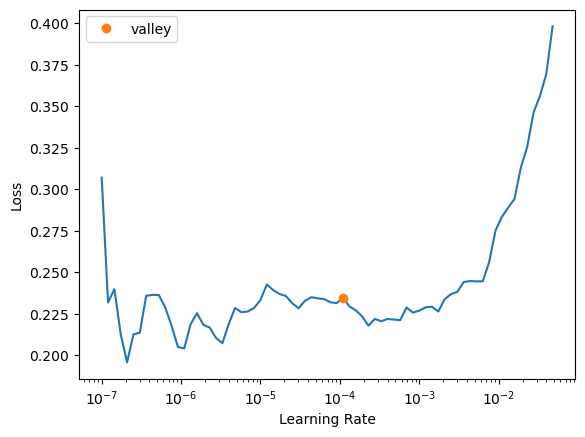

In [17]:
# We can save and reload models at any time.
learner.lr_find()
learner.save('weed-2')

In [18]:
# Interpretations are usefull to get some information about our models
interpretation = ClassificationInterpretation.from_learner(learner)
losses,indexes = interpretation.top_losses()
len(data_loader.valid_ds)==len(losses)==len(indexes)

True

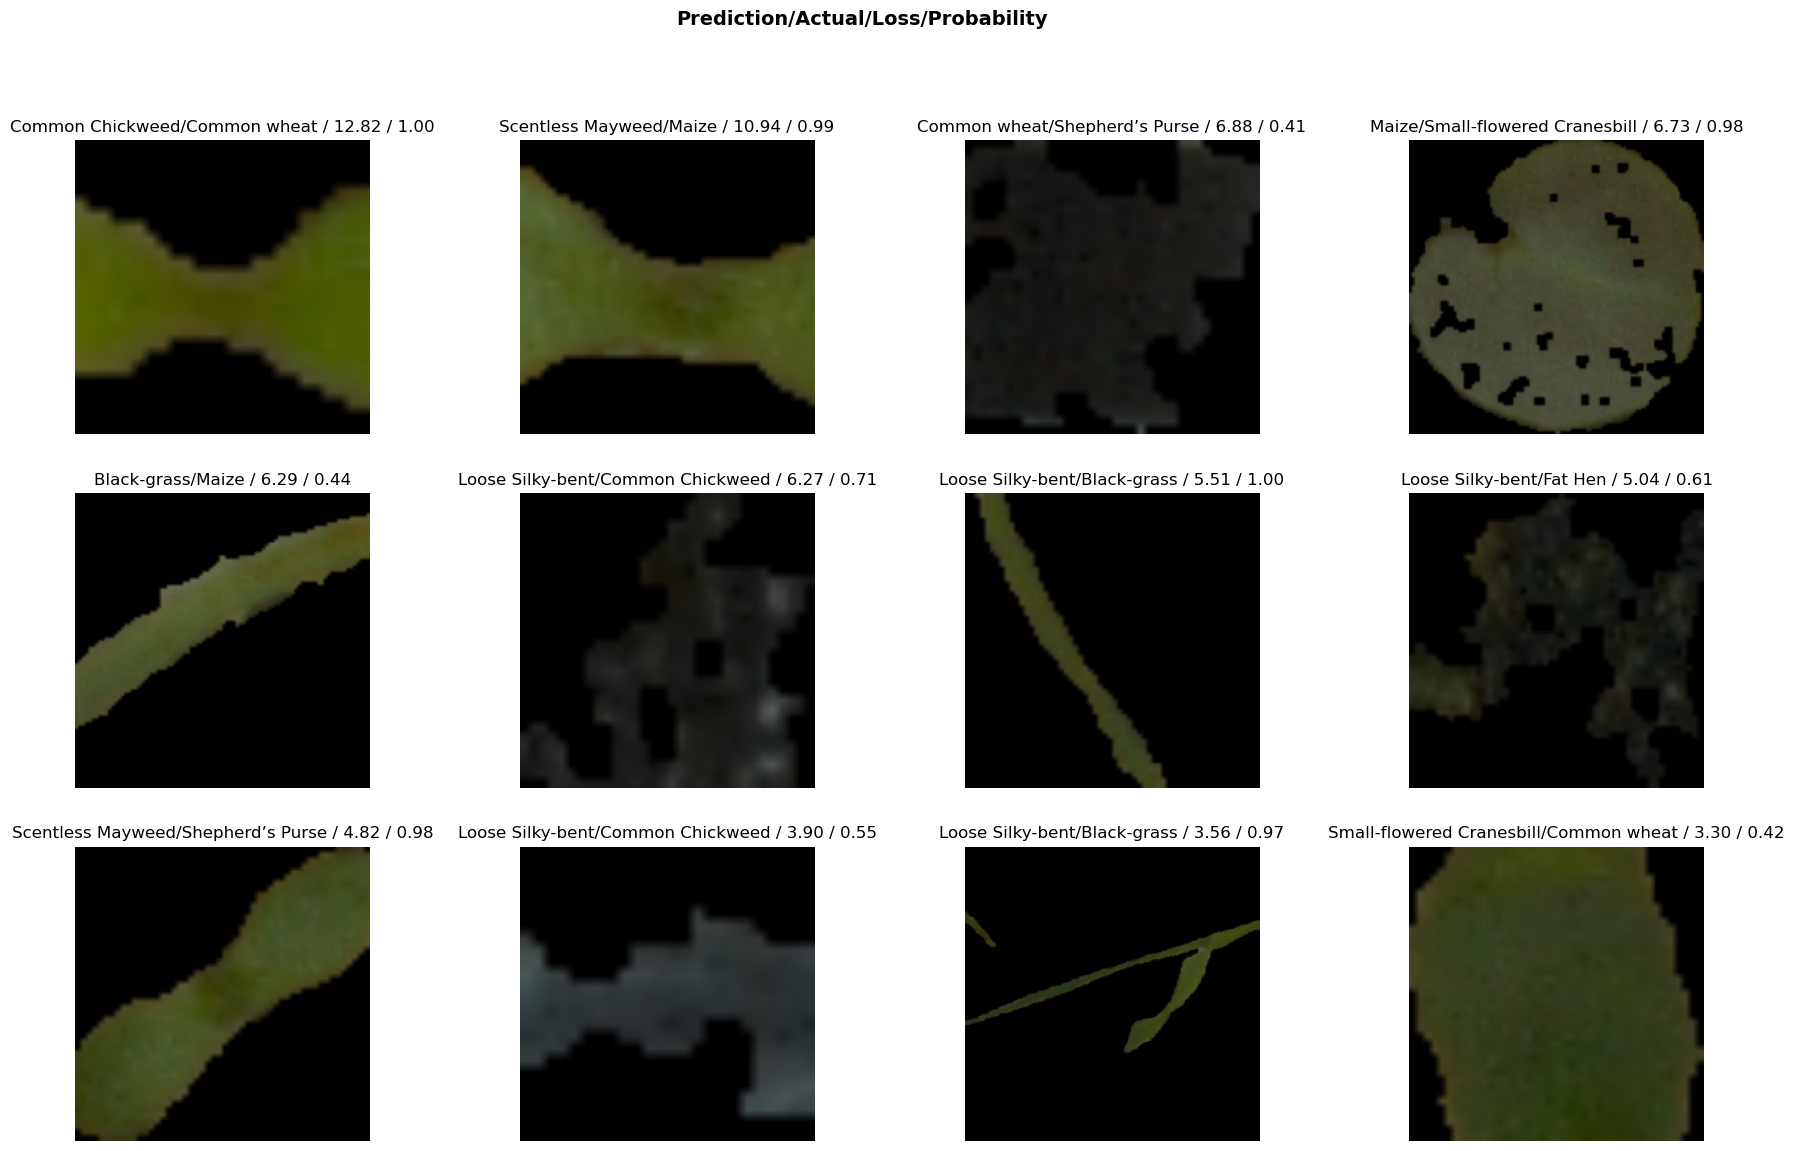

In [19]:
interpretation.plot_top_losses(12, figsize=(22,13))

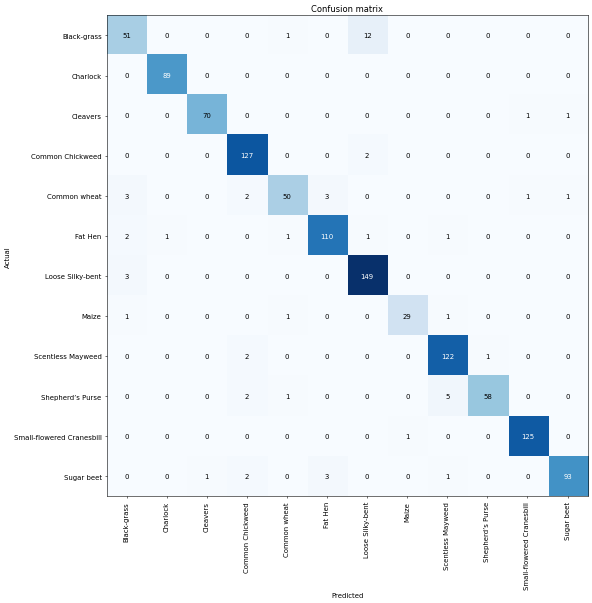

In [20]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=50)

In [81]:
interpretation.most_confused(min_val=2)

[('Black-grass', 'Loose Silky-bent', 12),
 ('Shepherd’s Purse', 'Scentless Mayweed', 5),
 ('Common wheat', 'Black-grass', 3),
 ('Common wheat', 'Fat Hen', 3),
 ('Loose Silky-bent', 'Black-grass', 3),
 ('Sugar beet', 'Fat Hen', 3),
 ('Common Chickweed', 'Loose Silky-bent', 2),
 ('Common wheat', 'Common Chickweed', 2),
 ('Fat Hen', 'Black-grass', 2),
 ('Scentless Mayweed', 'Common Chickweed', 2),
 ('Shepherd’s Purse', 'Common Chickweed', 2),
 ('Sugar beet', 'Common Chickweed', 2)]

In [80]:
learner.export('weed-3.pkl')

## Task

In [77]:
# Syntax reminder: path = untar_data(URLs.CARS); path
test_image_path = 'Test_images/72.png'

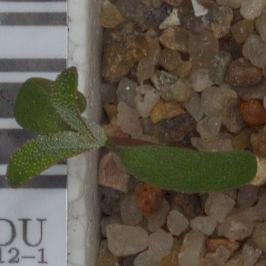

In [78]:
test_image = PILImage.create(test_image_path)
test_image

In [79]:
pred, _, _ = learner.predict(test_image)
print(f"Prediction: {pred}")

Prediction: Small-flowered Cranesbill
